In [1]:
import numpy as np
import matplotlib.pyplot as plt

/var/folders/xv/w6vjg90x4pd72d9mbrnc1v6h0000gn/T/ipykernel_1813/2072954210.py:30: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown
  fig.show()


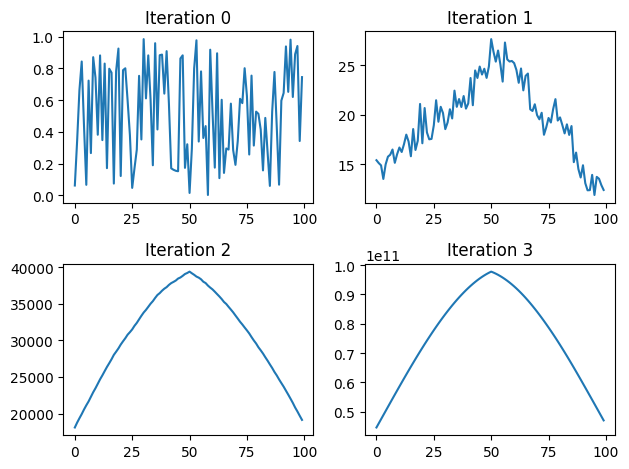

In [20]:
# ex1
N = 100
x = np.random.rand(N)

def convolution(x, N):
    result = np.zeros(2 * N - 1)
    for n in range(2 * N - 1):
        for k in range(N):
            if n - k >= 0 and n - k < N:
                result[n] += x[n - k] * x[k]
    
    
    left = (N - 1) // 2
    right = (N - 1) // 2 + 1 if (N - 1) % 2 else (N - 1) // 2     
    
    return result[left : 2 * N - 1 - right]


fig, axs = plt.subplots(2, 2)

for i in range(4):
    if i:
        x = convolution(x, N)
    
    axs[i // 2][i % 2].plot(x)
    axs[i // 2][i % 2].set_title("Iteration {i}".format(i=i))
    
fig.tight_layout()
fig.savefig("ex1.pdf")
fig.show()

# distributia gaussiana

In [22]:
# ex2

N = 3
p = np.random.randint(10, size=N)
q = np.random.randint(10, size=N)

def full_convolution(p, q, N):
    result = np.zeros(2 * N - 1, dtype=int)

    for n in range(2 * N - 1):
        for k in range(N):
            if n - k >= 0 and n - k < N:
                result[n] += p[n - k] * q[k]
                
    return result

def fft_convolution(poly1, poly2, N):
    
    n = 2**int(np.ceil(np.log2(2 * N - 1)))
    
    fft_poly1 = np.fft.rfft(poly1, n)
    fft_poly2 = np.fft.rfft(poly2, n)
    
    return np.fft.irfft(fft_poly1 * fft_poly2).astype(int)[: 2 * N - 1]

prod_convolution = full_convolution(p, q, N)
prod_fft = fft_convolution(p, q, N)

/var/folders/xv/w6vjg90x4pd72d9mbrnc1v6h0000gn/T/ipykernel_1813/1983027864.py:30: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown
  fig.show()


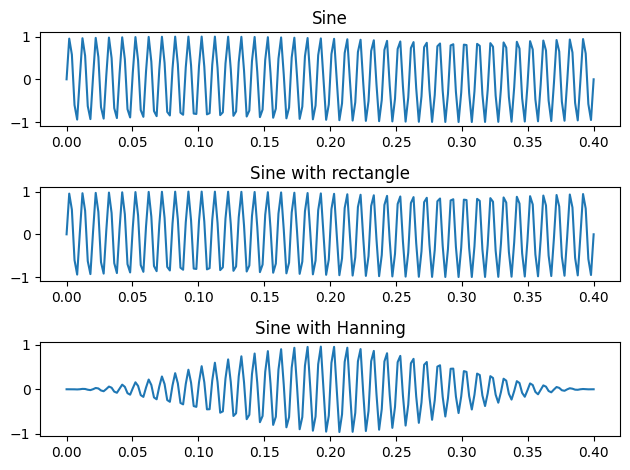

In [29]:
# ex3

def rectangular(nw):
    return np.ones(nw)

def hanning(nw):
    n = np.array(range(nw))
    return 0.5 * (1 - np.cos(2 * np.pi * n / nw))

nw = 200

x = np.linspace(0, 40 / 100, 200)
sine = np.sin(2 * np.pi * 100 * x)

sineRectangular = sine.copy() * rectangular(nw)

sineHanning = sine.copy() * hanning(nw)

fig, axs = plt.subplots(3)

axs[0].plot(x, sine)
axs[0].set_title("Sine")
axs[1].plot(x, sineRectangular)
axs[1].set_title("Sine with rectangle")
axs[2].plot(x, sineHanning)
axs[2].set_title("Sine with Hanning")

fig.tight_layout()
fig.savefig("ex3.pdf")
fig.show()

/var/folders/xv/w6vjg90x4pd72d9mbrnc1v6h0000gn/T/ipykernel_1813/1333302815.py:20: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown
  fig.show()


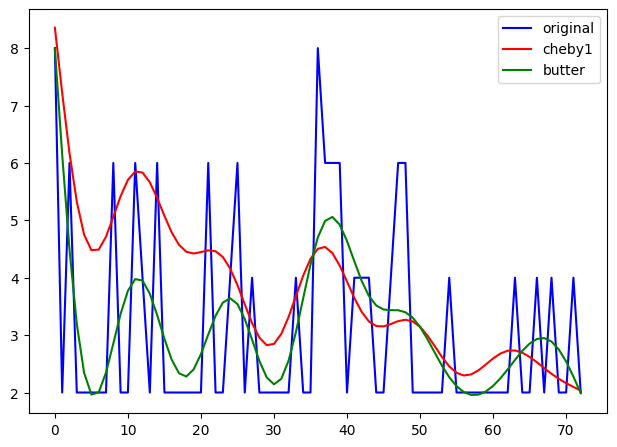

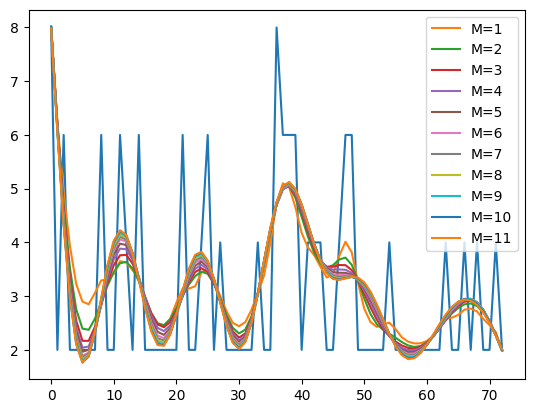

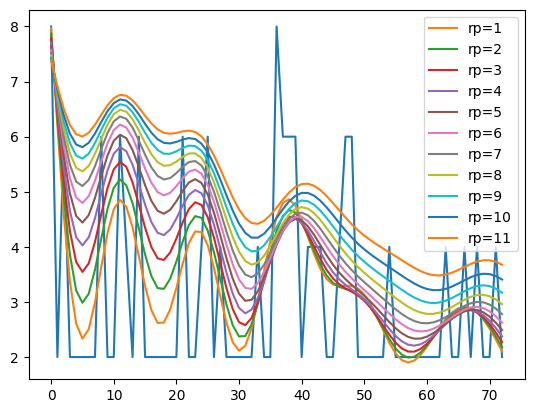

In [31]:
# ex4

import scipy

# a) 

x = np.genfromtxt('Train.csv', delimiter=',')[1:][: , 2][: 3 * 24 + 1]

# b) 

fig, axs = plt.subplots(2, 2)
for (i, w) in enumerate([5, 9, 13, 17]):
    smoothedX = np.convolve(x, np.ones(w), 'valid') / w
    
    axs[i // 2][i % 2].plot(smoothedX)
    axs[i // 2][i % 2].set_title("w={w}".format(w=w))
    
fig.tight_layout()
fig.savefig("ex4_b.pdf")
fig.show()

plt.clf()

# c)

nyquist = 0.5 * 1 / 3600
wn = 1 / (3600 * 12) # frecventa de taiere din lab 5
normalizedWn = wn / nyquist

# d)

b_butter, a_butter = scipy.signal.butter(5, normalizedWn, btype='low')
b_cheby1, a_cheby1 = scipy.signal.cheby1(5, 5, normalizedWn, btype='low')

# e)

butterSignal = scipy.signal.filtfilt(b_butter, a_butter, x)
cheby1Signal = scipy.signal.filtfilt(b_cheby1, a_cheby1, x)

plt.plot(x, color='blue', label='original')
plt.plot(cheby1Signal, color='red', label='cheby1')
plt.plot(butterSignal, color='green', label='butter')

plt.legend()
plt.savefig("ex4_e.pdf")
plt.show()

plt.clf()

# aleg Cebyshev deoarece este mai important sa observam 
# fenomene periodice in trafic decat amplitudinea  
# datelor inregistrate

# f)

# selectez ordinul 9 pentru butterworth
# deoarece semnalul devine suficient de neted, 
# iar valori mai mari nu aduc un avantaj semnificativ

plt.plot(x)
for n in range(1, 12):
    b_butter, a_butter = scipy.signal.butter(n, normalizedWn, btype='low')
    butterSignal = scipy.signal.filtfilt(b_butter, a_butter, x)
    
    plt.plot(butterSignal, label="M={n}".format(n=n))

plt.legend()
plt.savefig("ex4_f_butter.pdf")
plt.show()
plt.clf()

# pentru ordin par la cheby amplitudinea 
# semnalului filtrat incepe sa scada mult 
# sub amplitudinea semnalului original

# aleg ordin 7 pentru cheby deoarece mai mult 
# de atat nu aduce un avantaj la netezime

# cu cat creste rp pentru cheby, cu atat 
# se taie din frecvente mai mult

plt.plot(x)
for n in range(1, 12):
    b_cheby1, a_cheby1 = scipy.signal.cheby1(7, n, normalizedWn, btype='low')
    cheby1Signal = scipy.signal.filtfilt(b_cheby1, a_cheby1, x)
    
    plt.plot(cheby1Signal, label="rp={n}".format(n=n))

plt.legend()
plt.savefig("ex4_f_cheby.pdf")
plt.show()
    

